# Taiwanese Bankrupcy

In [1]:
# imports
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.arff import loadarff
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import KFold
from naivebayes import NaiveBayes
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

plt.style.use('dark_background')
%matplotlib inline

In [2]:
# Load learn data

df = pd.read_csv("data/taiwanese-bankrupcy.csv")

In [3]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [4]:
# df.isna().sum()

In [5]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

In [6]:
df.shape

(6819, 96)

In [7]:
# remove leading and trailing whitespace in column names
df = df.rename(columns=lambda x: x.strip())

In [8]:
df.drop('Net Income Flag', axis=1, inplace=True)

## Custom Implementation

In [9]:
cols = ["algorithm", "scaler", "val", "accuracy", "precision", "recall", "f1", "total_time (sec)"]
results = pd.DataFrame(columns = cols)

In [10]:
train, test = train_test_split(df, test_size=0.3, random_state=42, shuffle=True)
X_test = test.drop(['Bankrupt?'], axis=1)
y_test = list(test['Bankrupt?'])

In [11]:
# Holdout on our model

# fitting the model
st1 = time.time()

nb = NaiveBayes()
nb.fit(train, 'Bankrupt?')

# prediction
predictions = nb.predict(X_test)
et2 = time.time()

total_time = et2-st1

new_row = pd.DataFrame({
    "algorithm": "Custom NB",
    "scaler": "None",
    "val": 'Holdout',
    "accuracy": accuracy_score(y_test, predictions),
    "precision":precision_score(y_test, predictions, average='macro', zero_division=0),
    "recall":recall_score(y_test, predictions, average='macro', zero_division=0),
    "f1": f1_score(y_test, predictions, average='macro', zero_division=0),
    "total_time (sec)": total_time
}, index=[0])

results = pd.concat([new_row, results.loc[:]]).reset_index(drop=True)

D:\TU Wien\Semester 3\ML\Assignment 2\naivebayes.py:109: RuntimeWarning: invalid value encountered in double_scalars
  probability_per_class[_class_name] = likelihood_per_class[_class_name] / likelihood_sum


In [12]:
results

,algorithm,scaler,val,accuracy,precision,recall,f1,total_time (sec)
0,Custom NB,None,Holdout,0.108993,0.499949,0.499902,0.107663,4.817553


In [13]:
# Perform the CV on our own model

# create the folds
kf5 = KFold(n_splits=5, shuffle=False)

accuracy = 0
precision = 0
recall = 0
f1 = 0

st = time.time()

for train_index, test_index in kf5.split(df):
    
    # create the train/test split properly
    train = df.iloc[train_index]
    test = df.iloc[test_index]
    X_test = test.drop(['Bankrupt?'], axis=1)
    y_test = list(test['Bankrupt?'])

    # fitting the model
    nb = NaiveBayes()
    nb.fit(train, 'Bankrupt?')
    
    # prediction
    predictions = nb.predict(X_test)
    
    accuracy += accuracy_score(y_test, predictions)
    precision += precision_score(y_test, predictions, average='macro', zero_division=0)
    recall += recall_score(y_test, predictions, average='macro', zero_division=0)
    f1 += f1_score(y_test, predictions, average='macro', zero_division=0)
    
et = time.time()    
total_time = et - st

D:\TU Wien\Semester 3\ML\Assignment 2\naivebayes.py:109: RuntimeWarning: invalid value encountered in double_scalars
  probability_per_class[_class_name] = likelihood_per_class[_class_name] / likelihood_sum
D:\TU Wien\Semester 3\ML\Assignment 2\naivebayes.py:109: RuntimeWarning: invalid value encountered in double_scalars
  probability_per_class[_class_name] = likelihood_per_class[_class_name] / likelihood_sum
D:\TU Wien\Semester 3\ML\Assignment 2\naivebayes.py:109: RuntimeWarning: invalid value encountered in double_scalars
  probability_per_class[_class_name] = likelihood_per_class[_class_name] / likelihood_sum
D:\TU Wien\Semester 3\ML\Assignment 2\naivebayes.py:109: RuntimeWarning: invalid value encountered in double_scalars
  probability_per_class[_class_name] = likelihood_per_class[_class_name] / likelihood_sum
D:\TU Wien\Semester 3\ML\Assignment 2\naivebayes.py:109: RuntimeWarning: invalid value encountered in double_scalars
  probability_per_class[_class_name] = likelihood_per_c

In [14]:
accuracy = accuracy / 5
precision = precision / 5
recall = recall / 5
f1 = f1 / 5

new_row = pd.DataFrame({
    "algorithm": "Custom NB",
    "scaler": "None",
    "val": 'CV',
    "accuracy": accuracy,
    "precision":precision,
    "recall":recall,
    "f1": f1,
    "total_time (sec)": total_time
}, index=[0])

results = pd.concat([new_row, results.loc[:]]).reset_index(drop=True)

In [15]:
results

,algorithm,scaler,val,accuracy,precision,recall,f1,total_time (sec)
0,Custom NB,None,CV,0.379222,0.507842,0.641776,0.273986,14.444993
1,Custom NB,None,Holdout,0.108993,0.499949,0.499902,0.107663,4.817553


## Scikit-learn NB

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

In [17]:
# holdout

le = LabelEncoder()

X = df.drop(columns=['Bankrupt?'])
y = df['Bankrupt?']

y = le.fit_transform (y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

st1 = time.time()

gnb = GaussianNB()
gnb.fit(X_train, y_train)

predictions = gnb.predict(X_test)
et2 = time.time()

new_row = pd.DataFrame({
    "algorithm": "Gaussian NB",
    "scaler": "None",
    "val": 'Holdout',
    "accuracy": accuracy_score(y_test, predictions),
    "precision": precision_score(y_test, predictions, average='macro', zero_division=0),
    "recall": recall_score(y_test, predictions, average='macro', zero_division=0),
    "f1": f1_score(y_test, predictions, average='macro', zero_division=0),
    "total_time (sec)": et2 - st1
}, index=[0])

results = pd.concat([new_row, results.loc[:]]).reset_index(drop=True)

In [18]:
results

,algorithm,scaler,val,accuracy,precision,recall,f1,total_time (sec)
0,Gaussian NB,None,Holdout,0.076735,0.501476,0.501603,0.076724,0.018454
1,Custom NB,None,CV,0.379222,0.507842,0.641776,0.273986,14.444993
2,Custom NB,None,Holdout,0.108993,0.499949,0.499902,0.107663,4.817553


In [19]:
# Cross validation on the sklearn NB

gnb = GaussianNB()

X = df.drop(columns=['Bankrupt?'])
y = df['Bankrupt?']
y = le.fit_transform (y)

st = time.time()

accuracy_scores = cross_val_score(gnb, X, y, cv=5, scoring="accuracy")

et = time.time()

precision_scores = cross_val_score(gnb, X, y, cv=5, scoring="precision")
recall_scores = cross_val_score(gnb, X, y, cv=5, scoring="recall")
f1_scores = cross_val_score(gnb, X, y, cv=5, scoring="f1")

In [20]:
new_row = pd.DataFrame({
    "algorithm": "Gaussian NB",
    "scaler": "None",
    "val": 'CV',
    "accuracy": accuracy_scores.mean(),
    "precision": precision_scores.mean(),
    "recall": recall_scores.mean(),
    "f1": f1_scores.mean(),
    "total_time (sec)": et - st
}, index=[0])

results = pd.concat([new_row, results.loc[:]]).reset_index(drop=True)

In [21]:
results

,algorithm,scaler,val,accuracy,precision,recall,f1,total_time (sec)
0,Gaussian NB,None,CV,0.241064,0.041623,0.772727,0.063983,0.107095
1,Gaussian NB,None,Holdout,0.076735,0.501476,0.501603,0.076724,0.018454
2,Custom NB,None,CV,0.379222,0.507842,0.641776,0.273986,14.444993
3,Custom NB,None,Holdout,0.108993,0.499949,0.499902,0.107663,4.817553


## Scikit-learn Mlp

In [22]:
# holdout

le = LabelEncoder()

X = df.drop(columns=['Bankrupt?'])
y = df['Bankrupt?']

y = le.fit_transform (y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

st1 = time.time()

mlp = MLPClassifier()
mlp.fit(X_train, y_train)
predictions = mlp.predict(X_test)

et2 = time.time()

# without scaling
new_row = pd.DataFrame({
    "algorithm": "MLP",
    "scaler": "None",
    "val": 'Holdout',
    "accuracy": accuracy_score(y_test, predictions),
    "precision": precision_score(y_test, predictions, average='macro', zero_division=0),
    "recall": recall_score(y_test, predictions, average='macro', zero_division=0),
    "f1": f1_score(y_test, predictions, average='macro', zero_division=0),
    "total_time (sec)": et2 - st1
}, index=[0])

results = pd.concat([new_row, results.loc[:]]).reset_index(drop=True)

In [23]:
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

st1 = time.time()

mlp = MLPClassifier()
mlp.fit(X_train, y_train)
predictions = mlp.predict(X_test)

et2 = time.time()

# with scaling
new_row = pd.DataFrame({
    "algorithm": "MLP",
    "scaler": "StandardScaler",
    "val": 'Holdout',
    "accuracy": accuracy_score(y_test, predictions),
    "precision": precision_score(y_test, predictions, average='macro', zero_division=0),
    "recall": recall_score(y_test, predictions, average='macro', zero_division=0),
    "f1": f1_score(y_test, predictions, average='macro', zero_division=0),
    "total_time (sec)": et2 - st1
}, index=[0])

results = pd.concat([new_row, results.loc[:]]).reset_index(drop=True)

D:\TU Wien\Semester 3\ML\Assignment 2\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [24]:
results

,algorithm,scaler,val,accuracy,precision,recall,f1,total_time (sec)
0,MLP,StandardScaler,Holdout,0.959922,0.706799,0.597483,0.630044,7.386466
1,MLP,None,Holdout,0.935484,0.533523,0.529374,0.531219,1.708665
2,Gaussian NB,None,CV,0.241064,0.041623,0.772727,0.063983,0.107095
3,Gaussian NB,None,Holdout,0.076735,0.501476,0.501603,0.076724,0.018454
4,Custom NB,None,CV,0.379222,0.507842,0.641776,0.273986,14.444993
5,Custom NB,None,Holdout,0.108993,0.499949,0.499902,0.107663,4.817553


In [25]:
# Cross validation on the sklearn NB

# without scaling
mlp = MLPClassifier()

X = df.drop(columns=['Bankrupt?'])
y = df['Bankrupt?']
y = le.fit_transform (y)

st = time.time()

accuracy_scores = cross_val_score(mlp, X, y, cv=5, scoring="accuracy")

et = time.time()

precision_scores = cross_val_score(mlp, X, y, cv=5, scoring="precision")
recall_scores = cross_val_score(mlp, X, y, cv=5, scoring="recall")
f1_scores = cross_val_score(mlp, X, y, cv=5, scoring="f1")

In [26]:
new_row = pd.DataFrame({
    "algorithm": "MLP",
    "scaler": "None",
    "val": 'CV',
    "accuracy": accuracy_scores.mean(),
    "precision": precision_scores.mean(),
    "recall": recall_scores.mean(),
    "f1": f1_scores.mean(),
    "total_time (sec)": et - st
}, index=[0])

results = pd.concat([new_row, results.loc[:]]).reset_index(drop=True)

In [27]:
# with scaling

X = df.drop(columns=['Bankrupt?'])
y = df['Bankrupt?']
y = le.fit_transform (y)

st = time.time()

mlp = MLPClassifier()
clf = make_pipeline(StandardScaler(), mlp)

accuracy_scores = cross_val_score(clf, X, y, cv=5, scoring="accuracy")

et = time.time()

precision_scores = cross_val_score(clf, X, y, cv=5, scoring="precision")
recall_scores = cross_val_score(clf, X, y, cv=5, scoring="recall")
f1_scores = cross_val_score(clf, X, y, cv=5, scoring="f1")

D:\TU Wien\Semester 3\ML\Assignment 2\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\TU Wien\Semester 3\ML\Assignment 2\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\TU Wien\Semester 3\ML\Assignment 2\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\TU Wien\Semester 3\ML\Assignment 2\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\T

In [28]:
new_row = pd.DataFrame({
    "algorithm": "MLP",
    "scaler": "StandardScaler",
    "val": 'CV',
    "accuracy": accuracy_scores.mean(),
    "precision": precision_scores.mean(),
    "recall": recall_scores.mean(),
    "f1": f1_scores.mean(),
    "total_time (sec)": et - st
}, index=[0])

results = pd.concat([new_row, results.loc[:]]).reset_index(drop=True)

In [29]:
# sort results by accuracy
results.sort_values(by="accuracy", ascending=False)

,algorithm,scaler,val,accuracy,precision,recall,f1,total_time (sec)
2,MLP,StandardScaler,Holdout,0.959922,0.706799,0.597483,0.630044,7.386466
0,MLP,StandardScaler,CV,0.948823,0.348394,0.254545,0.268234,44.825963
1,MLP,None,CV,0.938993,0.129574,0.059091,0.071255,7.467252
3,MLP,None,Holdout,0.935484,0.533523,0.529374,0.531219,1.708665
6,Custom NB,None,CV,0.379222,0.507842,0.641776,0.273986,14.444993
4,Gaussian NB,None,CV,0.241064,0.041623,0.772727,0.063983,0.107095
7,Custom NB,None,Holdout,0.108993,0.499949,0.499902,0.107663,4.817553
5,Gaussian NB,None,Holdout,0.076735,0.501476,0.501603,0.076724,0.018454


## Plots

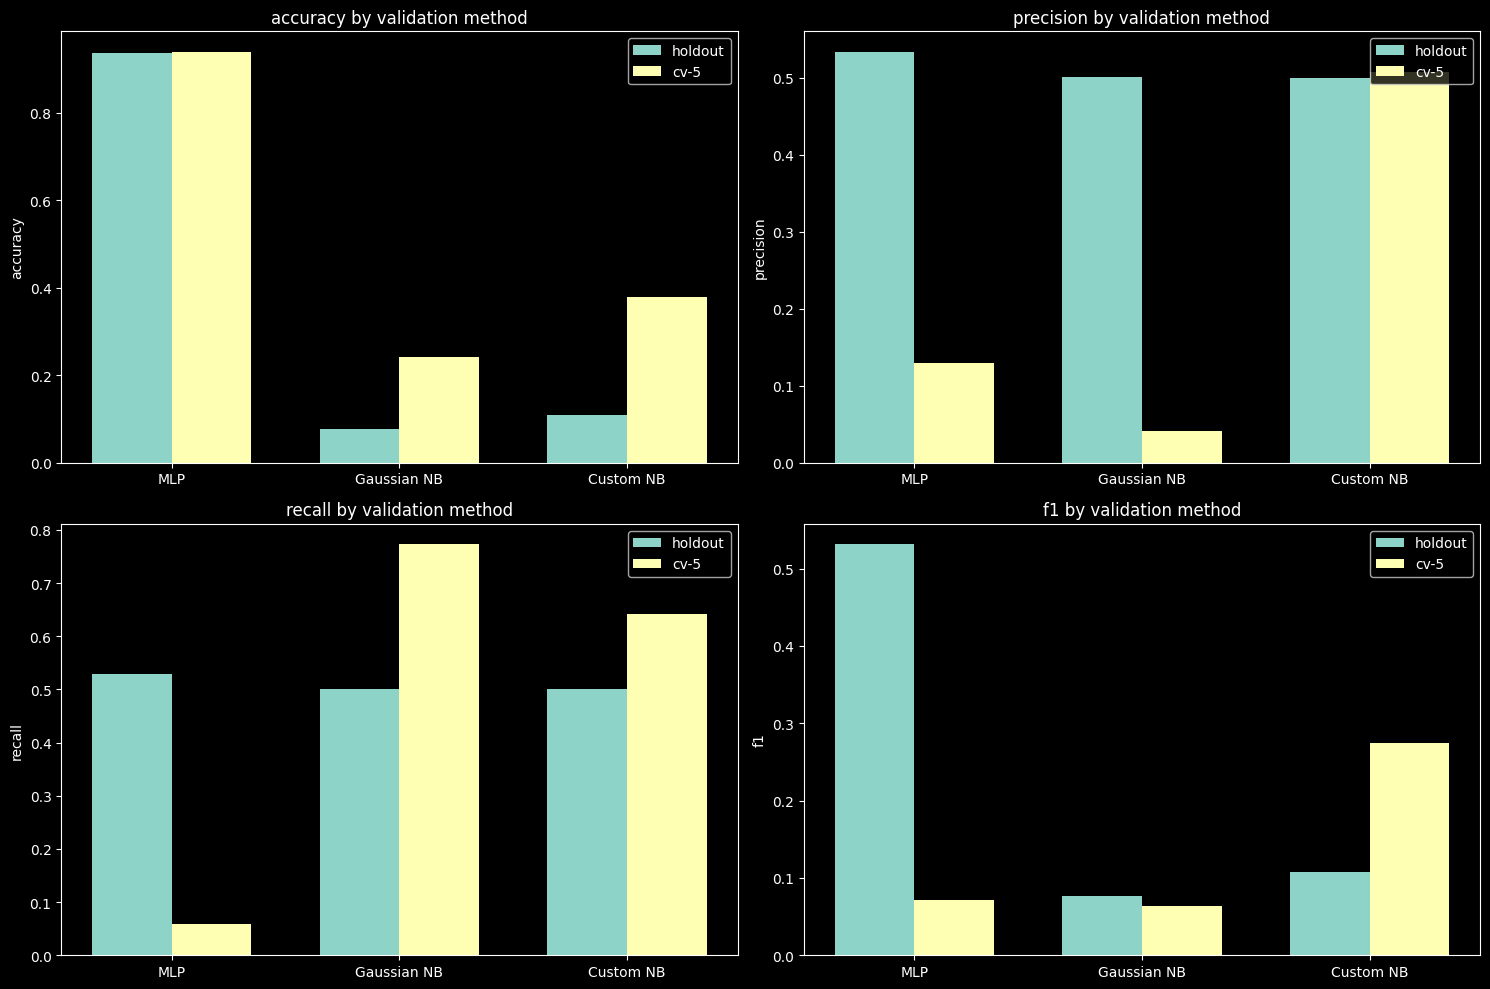

In [30]:
labels = ['MLP', 'Gaussian NB', 'Custom NB']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

results_comp_hw = results.loc[results['scaler'] == 'None']

fig, ax = plt.subplots(2,2)
fig.set_size_inches(15, h=10)
for i in range(2):
    for j in range(2):
        
        metric_idx = 3 + i*2 + j
        metric_name = results.columns[metric_idx]

         
        rects1 = ax[i,j].bar(x - width/2, results_comp_hw.loc[results_comp_hw['val'] == 'Holdout', metric_name], width, label='holdout')
        rects2 = ax[i,j].bar(x + width/2, results_comp_hw.loc[results_comp_hw['val'] == 'CV', metric_name], width, label='cv-5')

        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax[i,j].set_ylabel(metric_name)
        ax[i,j].set_title(f'{metric_name} by validation method')
        ax[i,j].set_xticks(x)
        ax[i,j].set_xticklabels(labels)
        ax[i,j].legend()

        fig.tight_layout()

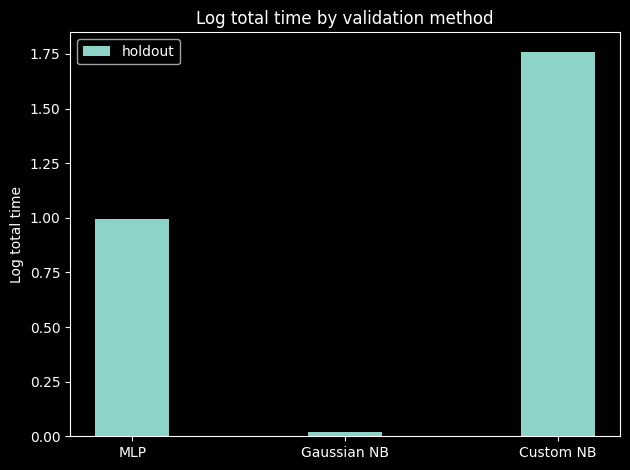

In [31]:
fig, ax = plt.subplots()
rects1 = ax.bar(x , np.log(1 + results_comp_hw.loc[results_comp_hw['val'] == 'Holdout', 'total_time (sec)']), width, label='holdout')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Log total time')
ax.set_title(f'Log total time by validation method')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()